## Experiments on CIFAR10 image dataset

In [1]:
import os
import torch
import utils
import loss
import sampling as sample
from trainImages import train_images, run_saved_model_images, generate_images_and_calculate_FID, run_saved_model_images_different_ts
from datasets import gaussian_clusters, ring, swiss_roll, waves
import loss 
import sampling as sample

# Set Global Seed
GLOBAL_SEED = 42
utils.set_global_seed(GLOBAL_SEED)

### Train the model

In [ ]:
function = train_images
scaling_type = 'Weighted'
loss_formulation = loss.diffusion_loss_epsilon
sample_type = sample.sampling_epsilon
utils.DiffusionImages(
            function, 
            scaling_type, 
            loss_formulation, 
            sample_type,
            generate_samples = True, 
            save_params = True,
            save_losses = True
        )

### Generate samples from saved model

Number of Steps:  500


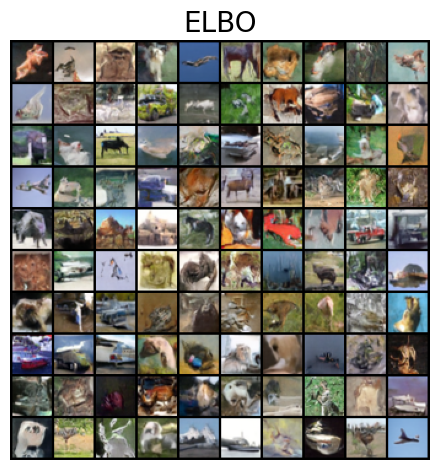

In [5]:
model_path = 'saved_models/Images/ELBO/diffusion_loss_x'
scaling_type = 'ELBO'
loss_formulation = loss.diffusion_loss_x
sample_type = sample.sampling_x
num_steps = 500
run_saved_model_images(model_path, scaling_type, sample_type, loss_formulation, num_steps)

### Calculate FID score

In [ ]:
scaling_type = 'Weighted'
loss = 'diffusion_loss_epsilon'
model_path = f'saved_models/Images/Weighted/model_epoch_150.pth'
sampling = sample.sampling_epsilon
num_steps = 500
fid_score, samples = generate_images_and_calculate_FID(model_path, sampling, loss, scaling_type, num_steps, num_images=50000, batch_size=100)